In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [2]:
np.random.seed(42)

In [3]:
df_b=pd.read_csv('df_behaviour.csv',delimiter=',')
df_d=pd.read_csv('df_demo.csv',delimiter=',')
df_p=pd.read_csv('df_psy.csv',delimiter=',')

In [5]:
df_b.set_index("customer_id", inplace=True)
df_d.set_index("customer_id", inplace=True)
df_p.set_index("customer_id", inplace=True)

# BEHAVIOUR SEGMENT

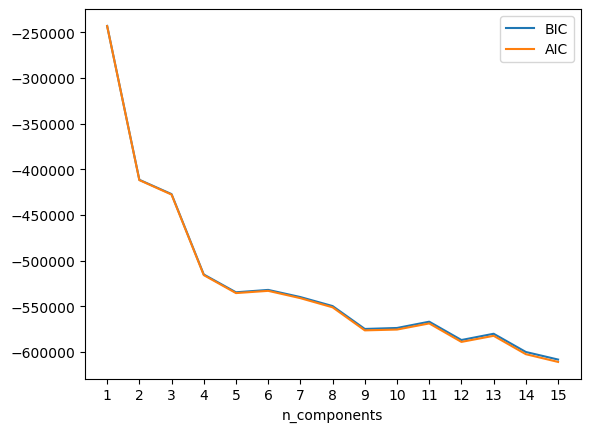

In [6]:
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=42).fit(df_b)
          for n in n_components]

bic_values = [m.bic(df_b) for m in models]
aic_values = [m.aic(df_b) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [13]:
gmm = GaussianMixture(n_components=4, covariance_type='full', n_init=10, init_params='kmeans', random_state=42)
gmm_labels_b = gmm.fit_predict(df_b)

In [14]:
silhouette_avg_b = silhouette_score(df_b, gmm_labels_b)
print("The average silhouette score is :", silhouette_avg_b)

The average silhouette score is : 0.13372936502699737


# Demographic Segment

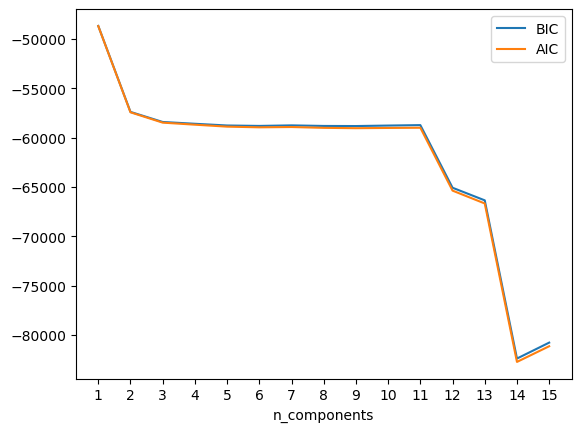

In [16]:
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=42).fit(df_d)
          for n in n_components]

bic_values = [m.bic(df_d) for m in models]
aic_values = [m.aic(df_d) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [22]:
gmm = GaussianMixture(n_components=13, covariance_type='full', n_init=10, init_params='kmeans', random_state=42)
gmm_labels_d = gmm.fit_predict(df_d)

In [23]:
silhouette_avg_d = silhouette_score(df_d, gmm_labels_d)
print("The average silhouette score is :", silhouette_avg_d)

The average silhouette score is : 0.6134924333801627


# Psychographic Segment

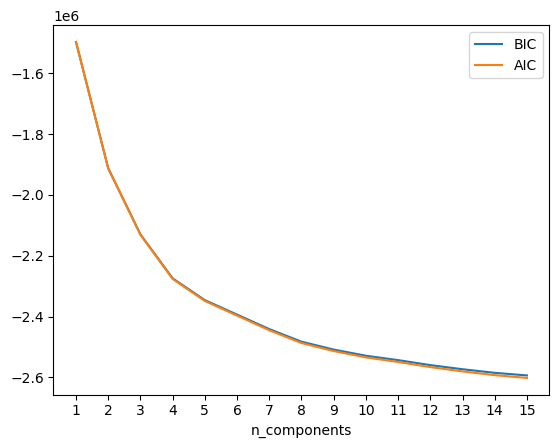

In [24]:
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=42).fit(df_p)
          for n in n_components]

bic_values = [m.bic(df_p) for m in models]
aic_values = [m.aic(df_p) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [29]:
gmm = GaussianMixture(n_components=4, covariance_type='full', n_init=10, init_params='kmeans', random_state=42)
gmm_labels_p = gmm.fit_predict(df_p)

In [30]:
silhouette_avg_p = silhouette_score(df_p, gmm_labels_p)
print("The average silhouette score is :", silhouette_avg_p)

The average silhouette score is : 0.10854535801738179


# Results

In [31]:
silhouette_scores = [silhouette_avg_b, silhouette_avg_d, silhouette_avg_p]

segments = ['Behaviour', 'Demographic', 'Psychographic']
components =[4,13,4]

table = pd.DataFrame({
    'Segment': segments,
    'Silhouette Score': silhouette_scores,
    'Number of Components': components
})

print(table)

         Segment  Silhouette Score  Number of Components
0      Behaviour          0.133729                     4
1    Demographic          0.613492                    13
2  Psychographic          0.108545                     4
